In [1]:
import tensorflow as tf

tf.enable_eager_execution()

C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\tensorf

In [2]:
!dir "../../../Datasets/NewGazeData"

 Volume in drive C is OS
 Volume Serial Number is 40F7-E25B

 Directory of C:\Users\Succe\Documents\Datasets\NewGazeData

21/02/2021  13:28    <DIR>          .
21/02/2021  13:28    <DIR>          ..
17/02/2019  09:41    <DIR>          0
17/02/2019  10:11    <DIR>          1
10/03/2019  14:46           100,354 eye_test.txt
10/03/2019  14:46           633,263 eye_train.txt
               2 File(s)        733,617 bytes
               4 Dir(s)  414,681,845,760 bytes free


In [3]:
with open("../../../Datasets/NewGazeData/eye_test.txt") as f:
    data = f.readlines()
    images = [i.replace('\n', '').split()[0] for i in data]
    coords = [i.replace('\n', '').split()[1:] for i in data]

In [4]:
images[:5]

['chingy-1',
 'will-estes-4',
 'colin-hanks-5',
 'kelly-ripa-1',
 'xxscreamkiwixx-1']

In [5]:
coords[:5]

[['78', '95', '176', '96'],
 ['84', '92', '172', '95'],
 ['83', '91', '172', '93'],
 ['72', '89', '185', '89'],
 ['81', '93', '168', '94']]

In [6]:
for i, coord in enumerate(coords):
    coords[i][0] = int(coord[0])
    coords[i][1] = int(coord[1])
    coords[i][2] = int(coord[2])
    coords[i][3] = int(coord[3])

In [7]:
coords[:5]

[[78, 95, 176, 96],
 [84, 92, 172, 95],
 [83, 91, 172, 93],
 [72, 89, 185, 89],
 [81, 93, 168, 94]]

In [8]:
import glob

In [9]:
image_paths = glob.glob("../../../Datasets/NewGazeData/0/*")

In [10]:
image_paths[:5]

['../../../Datasets/NewGazeData/0\\22-savage-1.jpg',
 '../../../Datasets/NewGazeData/0\\2dees-2.jpg',
 '../../../Datasets/NewGazeData/0\\2dees-3.jpg',
 '../../../Datasets/NewGazeData/0\\50-cent-9.jpg',
 '../../../Datasets/NewGazeData/0\\6foot4honda-3.jpg']

In [11]:
coord_dict = dict()
for img, coord in zip(images,coords):
    coord_dict[img] = coord

In [12]:
import os
path_dict = dict()
for img_path in image_paths:
    filename = os.path.basename(img_path).replace(".jpg", '')
    path_dict[filename] = img_path

In [13]:
set(path_dict).issubset(set(coord_dict))

False

In [14]:
len(set(coord_dict))

3452

In [15]:
len(image_paths)

3563

In [16]:
with open("../../../Datasets/NewGazeData/eye_train.txt") as f:
    data = f.readlines()
images = [i.replace('\n', '').split()[0] for i in data]
coords = [i.replace('\n', '').split()[1:] for i in data]
    
for i, coord in enumerate(coords):
    coords[i][0] = int(coord[0])
    coords[i][1] = int(coord[1])
    coords[i][2] = int(coord[2])
    coords[i][3] = int(coord[3])
    
coord_dict = dict()
for img, coord in zip(images,coords):
    coord_dict[img] = coord

print(len(coord_dict))

21832


In [17]:
image_paths = glob.glob("../../../Datasets/NewGazeData/1/*")

count = 0
path_dict = dict()
for img_path in image_paths:
    if '.jpg' in img_path:
        count += 1
    filename = os.path.basename(img_path).replace(".jpg", '')
    path_dict[filename] = img_path
    
print(len(path_dict))
assert len(path_dict) == count

22200


In [18]:
set(path_dict).issubset(set(coord_dict))

False

In [19]:
set(coord_dict).issubset(set(path_dict))

False

In [20]:
intersection = set(coord_dict).intersection(set(path_dict))
print(len(intersection))
print(intersection)

21826
{'cece-winans-3', 'cierra-healey-5', 'keleigh-sperry-2', 'chlo-subia-4', 'kate-middleton-6', 'ella-purnell-3', 'christa-miller-5', 'wan-arif-iskandar-4', 'raina-harten-1', 'kira-kazantsev-1', 'joely-richardson-6', 'tyler-hoechlin-4', 'ryan-lee-1', 'vanessa-simmons-3', 'sheamus-3', 'harry-styles-1', 'maria-quezada-3', 'shannon-elizabeth-1', 'lukedukebaseball-1', 'sharon-leal-1', 'breezylynn-6', 'christina-moore-2', 'lala-kent-5', 'bobby-lockwood-1', 'isabella-palmieri-9', 'mel-gibson-9', 'scott-baio-4', 'alex-hook-2', 'susan-sullivan-4', 'gil-birmingham-2', 'anika-noni-rose-1', 'jeremy-white-4', 'pat-sharp-1', 'john-slattery-1', 'adele-exarchopoulos-5', 'cory-zwierzynski-2', 'danelly-hoyer-3', 'megyn-price-5', 'eduardo-verastegui-3', 'alejandro-inarritu-1', 'irina-voronina-1', 'katheryn-winnick-4', 'metta-world-peace-3', 'roger-moore-3', 'josh-leyva-3', 'emily-ratajkowski-5', 'kevin-pollak-4', 'haley-reinhart-1', 'aleia-biggs-1', 'kaya-jones-4', 'phi-tran-3', 'jake-paul-5', 'baile

In [21]:
symmetric_difference = set(coord_dict).symmetric_difference(set(path_dict))
print(len(symmetric_difference))
print(symmetric_difference)

380
{'rose-mo-9', 'jeremy-meeks-8', 'a.j.-cook-4', 'precious-paris-7', 'sophia-body-9', 'jelinuh-4', 'putri-adrianna-4', 'sapphire-singer-6', 'naomi-jonzeck-1', 'precious-paris-6', 'heidi-hoback-4', 'reina-scully-2', 'melyssa-ford-1', 'zoe-hunter-3', 'johannes-bartl-6', 'alex-farnham-4', 'tyni-johnson-7', 'heyitsnick-4', 'aleksandar-lestaric-6', 'olden-polynice-3', 'zonnique-pullins-6', 'david-mustard-5', 'josh-levi-4', 'natalie-lynn-youtubestar-6', 'evelin-bennett-3', 'richard-t', 'sophia-montero-1', 'farina-aguinaldo-1', 'evelyn-braxton-3', 'sonnis-love-4', 'pete-zogoulas-4', 'manda31409-1', 'aarava-2', 'gillian-white-3', 'lauren-alaina-4', 'e.j.-bonilla-4', 'sam-chaloner-8', 'mithzan-1', 'peyton-evans-7', 'kat-florek-6', 'nicole-franzel-5', 'laura-lux-8', 'rory-fitzpatrick-webvideostar-6', 'jeremy-taylor-movieactor-4', 'chance-rapper-3', 'nik-west-6', 'dylan-dauzat-3', 'richard-t.jones-3', 'tony-abbott-6', 'opulent-neptune-3', 'dee-kosh-6', 'rebal-6', 'steph0sims-5', 'mandip-gill-1'

In [88]:
import sys
sys.path.insert(0, "../")

import tensorflow as tf
from tensorflow.compat.v1.image import crop_and_resize

from Dataset import Dataset2

In [89]:
opt = {
    'data_dir': 'C:/Users/Succe/Documents/Datasets/NewGazeData',
    'img_size': 256,
    'output_nc': 3,
    'capacity': 5000,
    'batch_size': 8,
    'num_threads': -1,
}

class Bunch(object):
    def __init__(self, adict):
        self.__dict__.update(adict)
opt = Bunch(opt)    

dataset = Dataset2(opt)
train_dataset, test_dataset = dataset.input()

In [90]:
def get_Mask_and_pos(eye_pos, flag=0):
    """ Given eye_pos (shape=[4,]), 
        returns masks for cropping eyes. 
    """
    batch_mask = []
    batch_left_eye_pos = []
    batch_right_eye_pos = []
    for i in range(opt.batch_size):

        current_eye_pos = eye_pos[i]
        left_eye_pos = []
        right_eye_pos = []

        if flag == 0:

            mask = np.zeros(shape=[opt.img_size, opt.img_size, opt.output_nc])
            scale = current_eye_pos[1] - 15
            down_scale = current_eye_pos[1] + 15
            l1_1 =int(scale)
            u1_1 =int(down_scale)
            #x
            scale = current_eye_pos[0] - 25
            down_scale = current_eye_pos[0] + 25
            l1_2 = int(scale)
            u1_2 = int(down_scale)

            mask[l1_1:u1_1, l1_2:u1_2, :] = 1.0
            left_eye_pos.append(float(l1_1)/opt.img_size)
            left_eye_pos.append(float(l1_2)/opt.img_size)
            left_eye_pos.append(float(u1_1)/opt.img_size)
            left_eye_pos.append(float(u1_2)/opt.img_size)

            scale = current_eye_pos[3] - 15
            down_scale = current_eye_pos[3] + 15
            l2_1 = int(scale)
            u2_1 = int(down_scale)

            scale = current_eye_pos[2] - 25
            down_scale = current_eye_pos[2] + 25
            l2_2 = int(scale)
            u2_2 = int(down_scale)

            mask[l2_1:u2_1, l2_2:u2_2, :] = 1.0

            right_eye_pos.append(float(l2_1) / opt.img_size)
            right_eye_pos.append(float(l2_2) / opt.img_size)
            right_eye_pos.append(float(u2_1) / opt.img_size)
            right_eye_pos.append(float(u2_2) / opt.img_size)

        batch_mask.append(mask)
        batch_left_eye_pos.append(left_eye_pos)
        batch_right_eye_pos.append(right_eye_pos)

    return np.array(batch_mask), np.array(batch_left_eye_pos), np.array(batch_right_eye_pos)

def crop_resize(input, boxes_left, boxes_right):

    shape = [int(item) for item in input.shape.as_list()]
    return crop_and_resize(input, boxes=boxes_left, box_ind=list(range(0, shape[0])),
                                    crop_size=[int(shape[-3] / 2), int(shape[-2] / 2)]), \
            crop_and_resize(input, boxes=boxes_right, box_ind=list(range(0, shape[0])),
                                crop_size=[int(shape[-3] / 2), int(shape[-2] / 2)])


In [104]:
for x, eye_pos in train_dataset.take(1):
    print(x.shape, eye_pos.shape)
    
    xm, x_left_p, x_right_p = get_Mask_and_pos(eye_pos)
    xc = x * (1 - xm)  #corrputed images
    xl_left, xl_right = crop_resize(x, x_left_p, x_right_p)
    break

(8, 256, 256, 3) (8, 4)


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

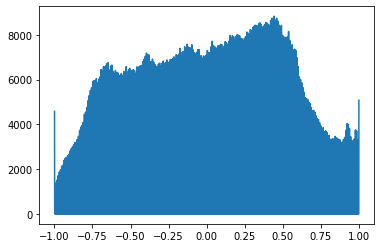

In [112]:
counts, values = np.histogram(batch_imgs.numpy().flatten(), bins=2550)
plt.plot(values[1:], counts)

In [108]:
np_imgs = x.numpy()
np_eye_pos = eye_pos.numpy()

In [109]:
print("Mean: {}, \nStd: {}, \nMax: {}, \nMin: {}".format(np_imgs.mean(), np_imgs.std(), np_imgs.max(), np_imgs.min()))

Mean: 0.055776726454496384, 
Std: 0.50676429271698, 
Max: 1.0, 
Min: -1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


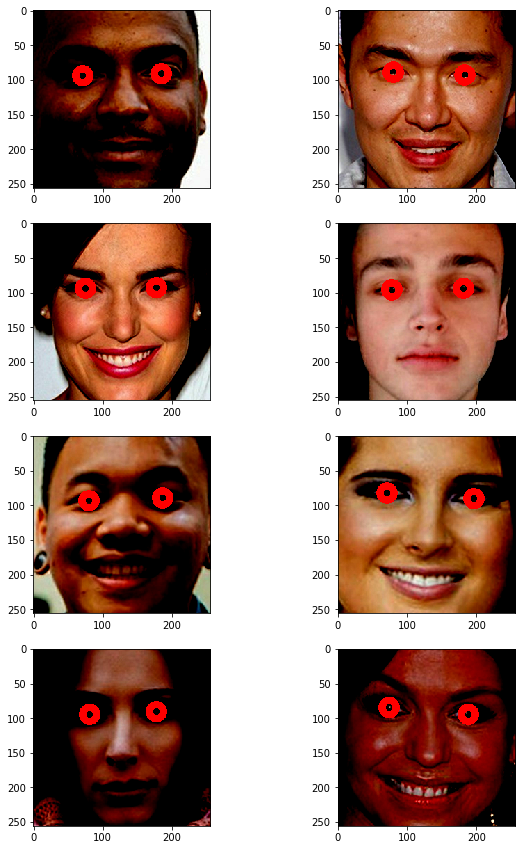

In [110]:
_, axs = plt.subplots(4,2, figsize=(10,15))

for i in range(4):
    
    
    
    img0 = cv2.circle(np_imgs[i*2], tuple(np_eye_pos[i*2][:2]), 10, 1, 10)
    img0 = cv2.circle(img0, tuple(np_eye_pos[i*2][2:]), 10, 1, 10)
    
    img1 = cv2.circle(np_imgs[i*2+1], tuple(np_eye_pos[i*2+1][:2]), 10, 1, 10)
    img1 = cv2.circle(img1, tuple(np_eye_pos[i*2+1][2:]), 10, 1, 10)
    
    np_eye_pos[i+1]
    
    axs[i][0].imshow(img0)
    axs[i][1].imshow(img1)
    

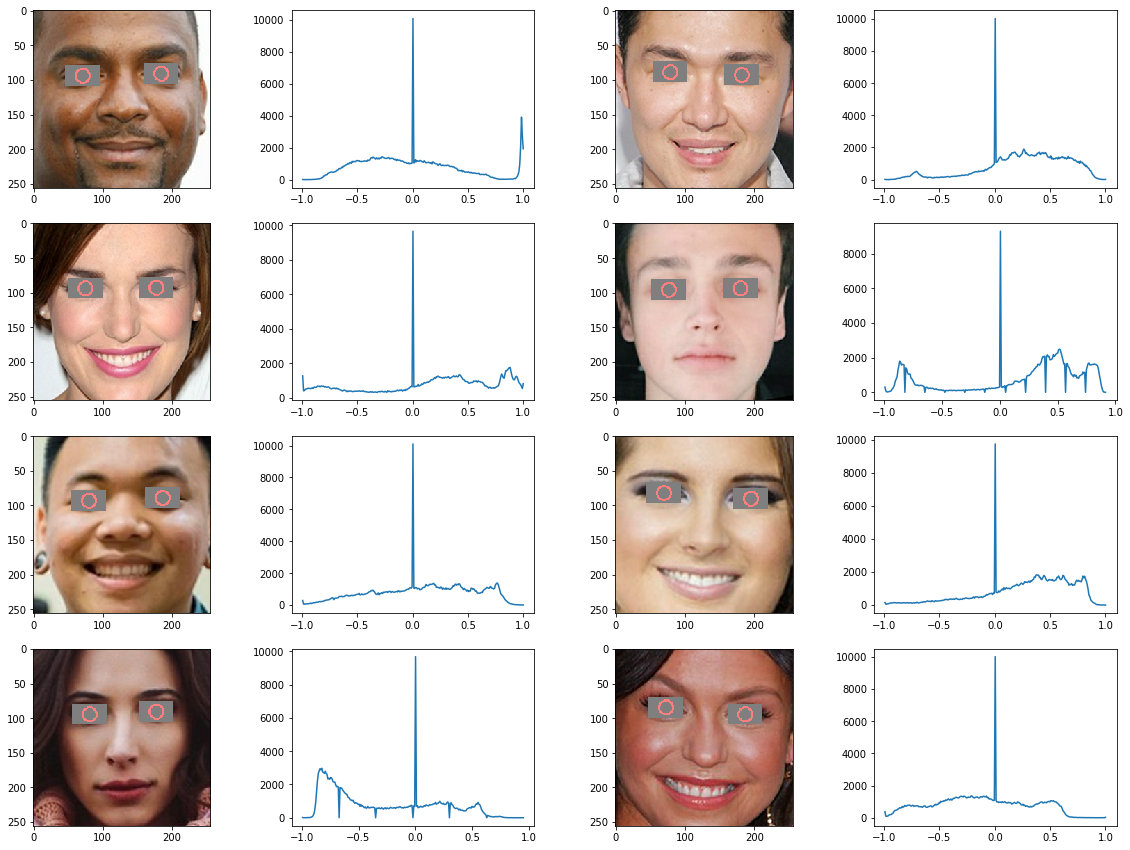

In [129]:
_, axs = plt.subplots(4,4, figsize=(20,15))

plot_img = xc.numpy().copy()

for i in range(4):
    
    
    img0 = plot_img[i*2].copy()
    img0 = cv2.circle(img0, tuple(np_eye_pos[i*2][:2]), 10, 1, 2)
    img0 = cv2.circle(img0, tuple(np_eye_pos[i*2][2:]), 10, 1, 2)
    
    img1 = plot_img[i*2+1].copy()
    img1 = cv2.circle(img1, tuple(np_eye_pos[i*2+1][:2]), 10, 1, 2)
    img1 = cv2.circle(img1, tuple(np_eye_pos[i*2+1][2:]), 10, 1, 2)
    

    axs[i][0].imshow(img0*0.5+0.5)
    axs[i][2].imshow(img1*0.5+0.5)
    
    counts, values = np.histogram(plot_img[i*2].flatten(), bins=255)
    axs[i][1].plot(values[1:], counts)
    counts, values = np.histogram(plot_img[i*2+1].flatten(), bins=255)
    axs[i][3].plot(values[1:], counts)

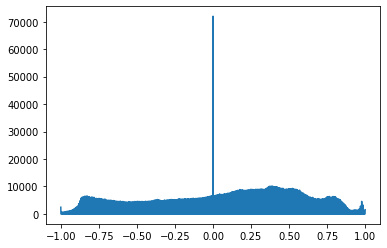

In [114]:
counts, values = np.histogram(xc.numpy().flatten(), bins=2550)
plt.plot(values[1:], counts)

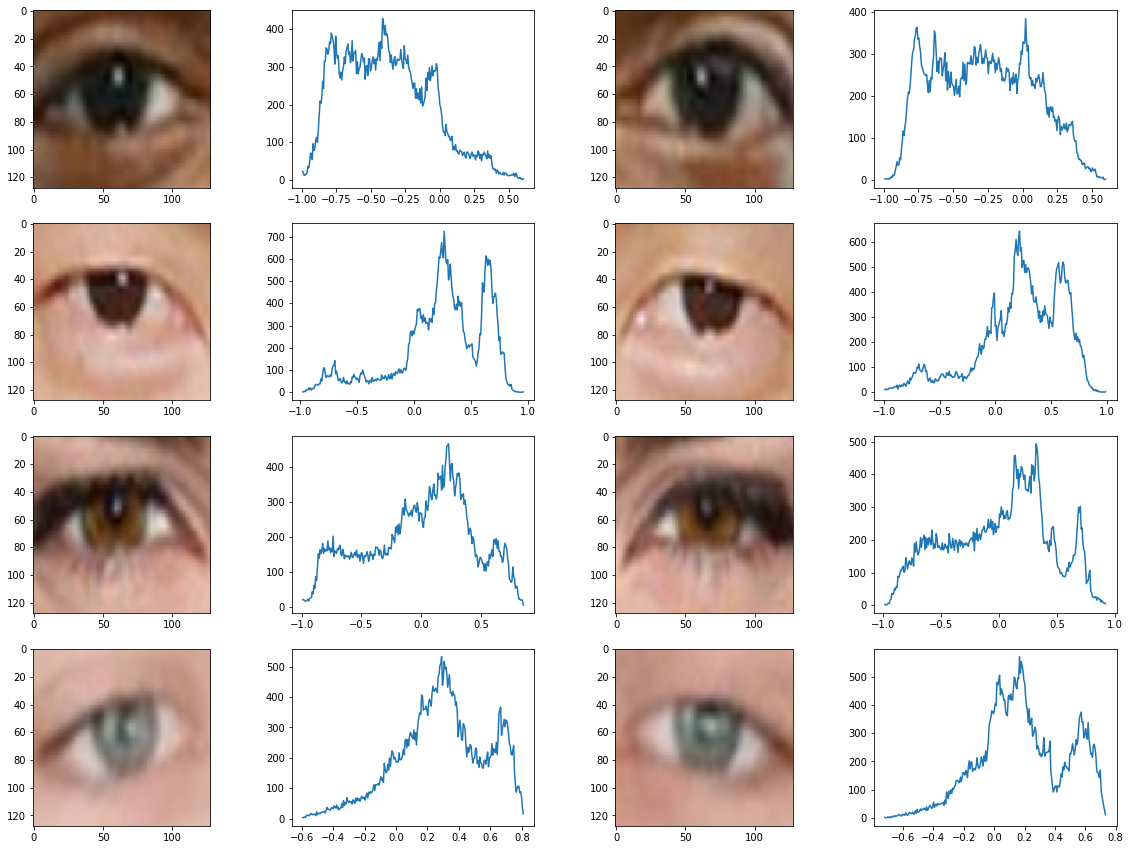

In [130]:
_, axs = plt.subplots(4,4, figsize=(20,15))

for i in range(4):
    
    
    img1 = xl_right[i].numpy().copy()
    img0 = xl_left[i].numpy().copy()
    
    axs[i][0].imshow(img0*0.5+0.5)
    axs[i][2].imshow(img1*0.5+0.5)
    
    counts, values = np.histogram(img0.flatten(), bins=255)
    axs[i][1].plot(values[1:], counts)
    counts, values = np.histogram(img1.flatten(), bins=255)
    axs[i][3].plot(values[1:], counts)